<a href="https://colab.research.google.com/github/Shrason/Machine-Learning/blob/main/Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Covid_multiple.csv')

In [ ]:
df.head(5)

,age,Body Temp,Chronic disease,Blood O2 Level in Percentage,Anti Bodies
0,10,Moderate,0,97,127181
1,80,High,0,92,61004
2,10,Low,0,97,111911
3,81,High,4,75,39010
4,12,Moderate,0,97,110911


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           70 non-null     int64 
 1   Body Temp                     70 non-null     object
 2   Chronic disease               70 non-null     int64 
 3   Blood O2 Level in Percentage  70 non-null     int64 
 4   Anti Bodies                   70 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.9+ KB


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 1.0 10 0 97]
 [1.0 0.0 0.0 80 0 92]
 [0.0 1.0 0.0 10 0 97]
 [1.0 0.0 0.0 81 4 75]
 [0.0 0.0 1.0 12 0 97]
 [0.0 1.0 0.0 18 0 66]
 [0.0 0.0 1.0 13 0 93]
 [1.0 0.0 0.0 94 4 64]
 [1.0 0.0 0.0 86 2 76]
 [0.0 0.0 1.0 20 0 92]
 [0.0 0.0 1.0 15 0 94]
 [0.0 0.0 1.0 15 0 92]
 [0.0 1.0 0.0 16 0 92]
 [0.0 0.0 1.0 17 0 93]
 [0.0 0.0 1.0 18 0 93]
 [0.0 0.0 1.0 19 0 92]
 [0.0 0.0 1.0 19 0 89]
 [0.0 0.0 1.0 12 0 97]
 [0.0 0.0 1.0 20 0 93]
 [0.0 0.0 1.0 24 0 92]
 [0.0 0.0 1.0 25 0 93]
 [1.0 0.0 0.0 59 2 68]
 [1.0 0.0 0.0 63 1 66]
 [0.0 0.0 1.0 25 1 62]
 [1.0 0.0 0.0 26 0 94]
 [0.0 1.0 0.0 26 0 97]
 [0.0 0.0 1.0 28 0 99]
 [1.0 0.0 0.0 59 0 69]
 [0.0 0.0 1.0 28 0 89]
 [0.0 0.0 1.0 29 0 93]
 [0.0 0.0 1.0 48 0 93]
 [0.0 0.0 1.0 30 0 62]
 [0.0 0.0 1.0 30 0 86]
 [0.0 0.0 1.0 32 0 84]
 [0.0 0.0 1.0 34 1 90]
 [0.0 0.0 1.0 35 0 89]
 [1.0 0.0 0.0 50 2 77]
 [1.0 0.0 0.0 56 2 76]
 [1.0 0.0 0.0 56 1 77]
 [1.0 0.0 0.0 36 1 90]
 [1.0 0.0 0.0 38 2 75]
 [0.0 0.0 1.0 40 0 90]
 [1.0 0.0 0.0 40 0 92]
 [1.0 0.0 0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 60698.49  59994.  ]
 [106610.63 127181.  ]
 [ 63304.78  50104.  ]
 [105389.04 110911.  ]
 [ 63167.55  62019.  ]
 [ 99229.33  97101.  ]
 [102601.65 101000.  ]
 [ 89034.77  90015.  ]
 [ 82347.89  84008.  ]
 [105089.42 100000.  ]
 [ 83253.02  75012.  ]
 [ 98911.    98101.  ]
 [103823.24 112101.  ]
 [ 95591.14  99110.  ]
 [ 63790.34  67019.  ]
 [ 82127.04  83891.  ]
 [ 58956.78  56095.  ]
 [ 88794.05  90124.  ]
 [ 41626.83  41891.  ]
 [ 71873.93  73010.  ]
 [ 98566.79  98081.  ]]


<function matplotlib.pyplot.show(close=None, block=None)>

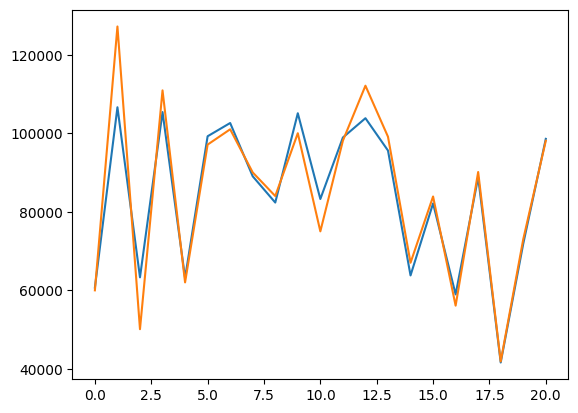

In [ ]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show